In [9]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
import matplotlib.pyplot as plt
from random import randint
import scipy.stats as ss
#from scipy.stats import norm, kurtosis, skew
import itertools as itt
import lxml
sns.set(rc={'figure.figsize':(11.7,8.27)})

# I Random Variables

If I roll a die, what are the possible outcomes I can get?
- one out of 6 outcomes

If I were to measure the average family income, how many outcomes can I get?
- This could be any value; nearly infinite possibilities

Random Variable = a variable that takes on numerical values as a result of a random experiment or measurement; associates a numerical value with each possible outcome. RV must have numerical values.

Two things to keep seperate in your mind:
1. The random variable itself
2. The possible outcomes or values the random variable can take

The random variable is denoted by a capital letter such as 'X'

The outcomes are denoted by lowercase letters (usually x). For our die throw example, our outcomes would be listed as 
- x=1
- x=2
- x=3
- x=4
- x=5
- x=6

## DISCRETE VS. CONTINUOUS RANDOM VARIABLE
A discrete random variable has a finite number of values or an infinite sequence of values (0,1,2,...) AND the differences between the outcomes are meaningful
- Die throw can only have 1,2,3,4,5,6 and each is meaningfully different

A continuous random variable has a nearly infinite number of outcomes that cannot be easily counted AND the differences between the outcomes are NOT meaningful
- With average income, the difference between $40,000.00 and $40,0000.01 is not meaningful

# Discrete Random Variable Basics


Discrete Random Variable
- Constituting a seperate thing.
- Consisting of unconnected distinct parts
- Mathematics Defined for a finite or countable set of values; not continuous

Example:
- Coin toss has only 1 of 2 outcomes
- Die throw only has 1 of 6 outcomes
- A test has 5 parts in which a student can pass has 1,2,3,4,5 of 5 outcomes

A discrete random variable is a variable that may take on either a finite number of values or an infinite sequences of values such as 0,1,2,3,...

# Discrete Random Variable Probabilities

Probability of a flip of an coin has 1 out of 2 outcomes
- $\frac{1}{2} = 50%$

The probabitlity distribution for a random variable X describes how probabilities are assigned to each outcome for the random variable.

Let 0=Heads and 1=Tails for a coin flip. So our discrete random variable x is described as:
    
x = 0,1

The probability for each outcome is described by a discrete probability function denoted as P(x) 

In [5]:
coin_df = pd.DataFrame({'COIN OUTCOME': ['Heads','Tails','Sum of Probs'], 'x': [0,1,'-'], 'P(x)': [.50,.50,1]})
coin_df

,COIN OUTCOME,P(x),x
0,Heads,0.5,0
1,Tails,0.5,1
2,Sum of Probs,1.0,-


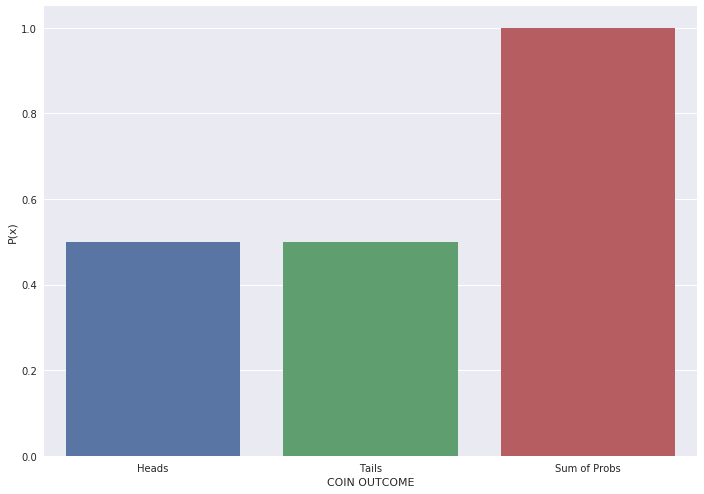

In [46]:
coin_df.loc[:1,'COIN OUTCOME']
sns.barplot(data=coin_df,x=coin_df['COIN OUTCOME'],y=coin_df['P(x)'])

In [37]:
dice_df = pd.DataFrame({'.x': [1,2,3,4,5,6,'Sum of Probs'], 'P(x)': [1/6,1/6,1/6,1/6,1/6,1/6,1]})
dice_df

,.x,P(x)
0,1,0.166667
1,2,0.166667
2,3,0.166667
3,4,0.166667
4,5,0.166667
5,6,0.166667
6,Sum of Probs,1.000000


Text(0.5,1,'Dice Rolls')

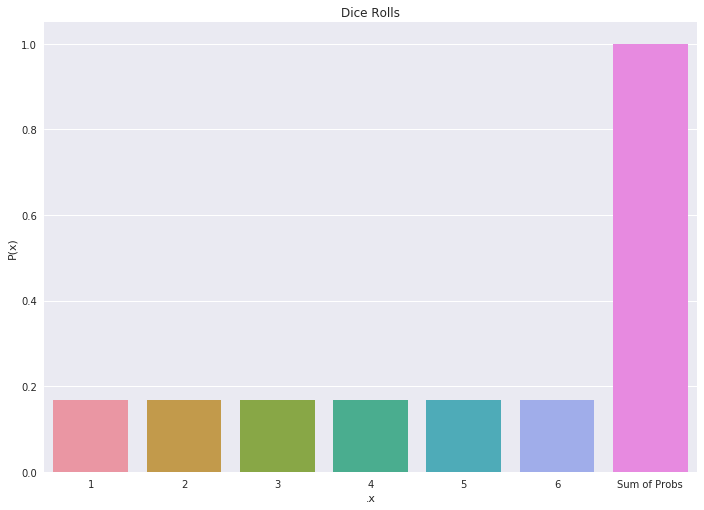

In [45]:
ax = sns.barplot(data=dice_df,x='.x',y='P(x)')
ax.set_title('Dice Rolls')

1 through 5 represents a class overall satisfaction score given by 108 students at end-of-semester evaluations:
- X = score
- x = 1,2,3,4,5

In [110]:
class_df = pd.DataFrame({'.x': ['1 (very dissatisfied)','2 (dissatisfied)','3 (neutral)', '4 (satisfied)','5 (very satisfied)', 'SUM'], 'count': [5,10,11,44,38,108], 'count/total = P(x)': [5/108,10/108,11/108,44/108,38/108,1]})
class_df

,.x,count,count/total = P(x)
0,1 (very dissatisfied),5,0.046296
1,2 (dissatisfied),10,0.092593
2,3 (neutral),11,0.101852
3,4 (satisfied),44,0.407407
4,5 (very satisfied),38,0.351852
5,SUM,108,1.000000


Text(0.5,1,'Class Satisfaction')

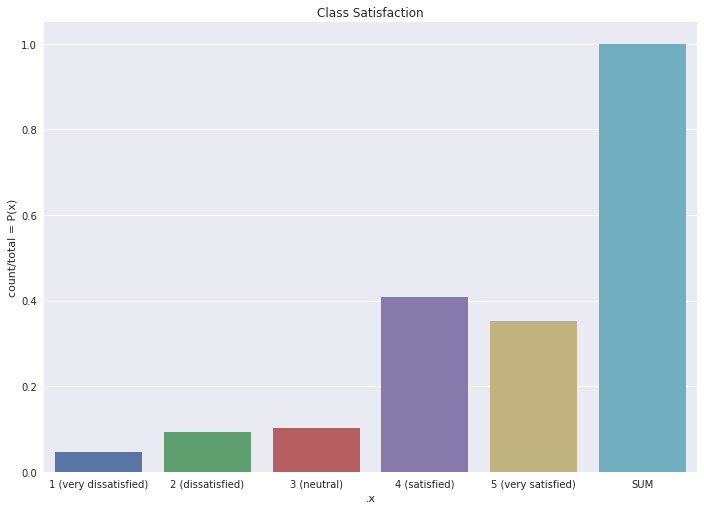

In [113]:
ax1 = sns.barplot(data=class_df,x='.x',y='count/total = P(x)')
ax1.set_title('Class Satisfaction')

## CONDITIONS FOR DISCRETE PROBABILITIES
Fundamental Rule of Probabilities: 0 <= P(x) <= 1

$\sum P(x) = 1$ - Sum of Probabilities must = 1

## COMPOUND PROBABILITIES
Probabilty of rolling a 2 or 5

x=2,5

P(x) = $\frac{1}{6}$ + $\frac{1}{6}$ = $\frac{1}{3}$

Probability of "satisfied or "very satisfied"

x=4,5

P(x) = .407 + .351 = .758

# II Expected Value

## Introductory Problem

On a Psychology 101 syllabus it states that your final grade will be determined by the following:
- Homework - 30%
- Quizzes - 20%
- Midterm - 25%
- Final - 25%

You received the following grades:
- Homework - 89
- Quizzes - 79
- Midterm - 84
- Final - 92

In [50]:
class_df = pd.DataFrame({'Assignment': ['Homework','Quizzes','Midterm','Final'], 'Grade': [89,79,84,92], 'Weight': [.30,.20,.25,.25]})
class_df

,Assignment,Grade,Weight
0,Homework,89,0.30
1,Quizzes,79,0.20
2,Midterm,84,0.25
3,Final,92,0.25


In [55]:
print('What is your final grade?')
class_df = pd.DataFrame({'Assignment': ['Homework','Quizzes','Midterm','Final'], 
                         'Grade': [89,79,84,92], 
                         'Weight': [.30,.20,.25,.25], 
                         'Grade*Weight': [89*.3,79*.2,84*.25,92*.25]})
print(class_df[['Assignment','Grade','Weight','Grade*Weight']])
print('Final Grade = ' + str(class_df['Grade*Weight'].sum()))

What is your final grade?
  Assignment  Grade  Weight  Grade*Weight
0   Homework     89    0.30          26.7
1    Quizzes     79    0.20          15.8
2    Midterm     84    0.25          21.0
3      Final     92    0.25          23.0
Final Grade = 86.5


## What is Expected Value
The expected value is simply the mean of a random variable; the average expected outcome. It does not have to be a value the discrete random variable can assume

\begin{equation}
E(X) = \mu = \sum xP(x)
\end{equation}
- E(X) is the expected value or mean of the outcomes x
- $\mu$ is the mean
- $\sum xP(x)$ is the sum of each random variable value x multiplied by its own probability P(x)

## Die Roll Example
If I roll a die many times and then average my rolls, what should I expect for $\mu$?

What is the mean of 1+2+3+4+5+6?

$\mu = 3.5$

In [5]:
die_df = pd.DataFrame({'.x': [1,2,3,4,5,6,'-'], 
                         'P(x)': ['1/6','1/6','1/6','1/6','1/6','1/6','Sum'], 
                         'xP(x)': ['1/6','2/6','3/6','4/6','5/6','6/6','21/6'], 
                       'Percentage xP(x)': [1/6,2/6,3/6,4/6,5/6,6/6,21/6]})
die_df

,.x,P(x),Percentage xP(x),xP(x)
0,1,1/6,0.166667,1/6
1,2,1/6,0.333333,2/6
2,3,1/6,0.500000,3/6
3,4,1/6,0.666667,4/6
4,5,1/6,0.833333,5/6
5,6,1/6,1.000000,6/6
6,-,Sum,3.500000,21/6


E(X) = 3.5


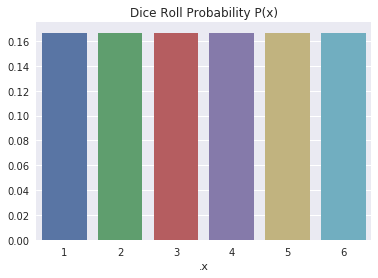

In [7]:
sums = [1/6,1/6,1/6,1/6,1/6,1/6]
ax1 = sns.barplot(data=die_df,x=die_df.loc[:5,'.x'],y=sums)
ax1.set_title('Dice Roll Probability P(x)')
print('E(X) = ' + str(21/6))

In [112]:
class_df1 = pd.DataFrame({'.x': [1,2,3,4,5], 
                         'count': [5,10,11,44,38], 
                         'count/total = P(x)': [5/108,10/108,11/108,44/108,38/108]})
class_df1['xP(x)'] = class_df1['.x']*class_df1['count/total = P(x)']
class_df1.loc[5] = ['Sum',108,1,3.70]
class_df1

,.x,count,count/total = P(x),xP(x)
0,1,5,0.046296,0.046296
1,2,10,0.092593,0.185185
2,3,11,0.101852,0.305556
3,4,44,0.407407,1.629630
4,5,38,0.351852,1.759259
5,Sum,108,1.000000,3.700000


E(X) = 3.70


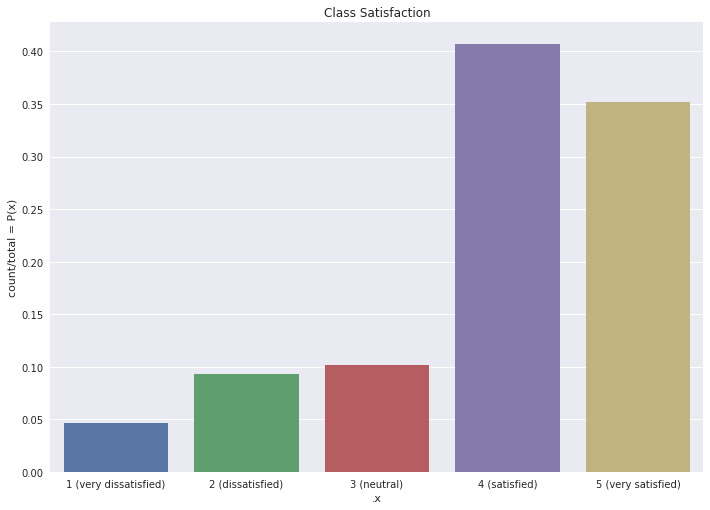

In [117]:
ax1 = sns.barplot(data=class_df,x=class_df.loc[:4,'.x'],y=class_df.loc[:4,'count/total = P(x)'])
ax1.set_title('Class Satisfaction')
print('E(X) = 3.70')

# III Discrete Random Variable Variance
- Though the expected value tells us the mean of a random variable oftentimes we need to know the variability, or how spread out the random variable is from its mean
- We can use the variance and standard deviation of a random variable to learn about how dispersed it is relative to its mean.
- This information can be used to calculate other statistics, compare data sets, and inform other conclusions about our data.

\begin{equation}
Var(x) = \sigma^2 = \sum{(x-\mu)^2}P(x)
\end{equation}

1. Calculate the expected value of X; the mean $\mu$
2. Take the random variable value x and subtract the expected value (mean) $\mu$
3. Square the difference found in Step 2
4. Multiply the squared difference by the probability of the random variable P(x) (in this step we are weighting the deviations using the probabilities)
5. Sum $\sum$ all of the squared weighted deviations found in Step 4 and you have the variance $\sigma^2$

The square root of the variance is the standard deviation

If I roll a die many times and then average my rolls, what should I expect for a mean of $\mu$?

We know that we have the numbers 1,2,3,4,5,6 and each number is equally likely to occur

What is the mean of 1+2+3+4+5+6?

\begin{equation}
\mu = 3.5
\end{equation}

In [9]:
die_df[['.x','P(x)','xP(x)']]

,.x,P(x),xP(x)
0,1,1/6,1/6
1,2,1/6,2/6
2,3,1/6,3/6
3,4,1/6,4/6
4,5,1/6,5/6
5,6,1/6,6/6
6,-,Sum,21/6


Remember the expected value is simply the mean of the random variable.

Over the long run, the expected mean $\mu$ for numerous rolls would be 3.5

In [18]:
die_df2 = pd.DataFrame({'.x': [1,2,3,4,5,6], 
                         'P(x)': [1/6,1/6,1/6,1/6,1/6,1/6], 
                         'u': [21/6,21/6,21/6,21/6,21/6,21/6]})
die_df2['(x-u)'] = die_df2['.x']-die_df2['u']
die_df2['(x-u)^2'] = die_df2['(x-u)']**2
die_df2['(x-u)^2P(x)'] = die_df2['(x-u)^2']*die_df2['P(x)']
die_df2

,.x,P(x),u,(x-u),(x-u)^2,(x-u)^2P(x)
0,1,0.166667,3.5,-2.5,6.25,1.041667
1,2,0.166667,3.5,-1.5,2.25,0.375000
2,3,0.166667,3.5,-0.5,0.25,0.041667
3,4,0.166667,3.5,0.5,0.25,0.041667
4,5,0.166667,3.5,1.5,2.25,0.375000
5,6,0.166667,3.5,2.5,6.25,1.041667


\begin{equation}
Var(x) = \sigma^2 = \sum{(x-\mu)^2}P(x) = \frac{35}{12} or 2.92
\end{equation}

E(X) = 3.5


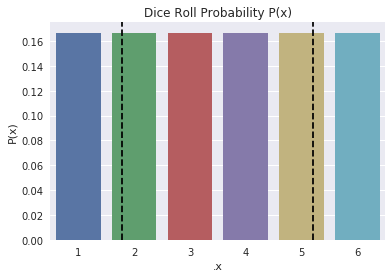

In [37]:
ax1 = sns.barplot(data=die_df2,x='.x',y='P(x)')
ax1.set_title('Dice Roll Probability P(x)')
ax1.axvline(3.5-2.71, color='k', linestyle='--')
ax1.axvline(3.5+.71, color='k', linestyle='--')
print('E(X) = ' + str(21/6))

\begin{equation}
Standard Deviation = \sigma = \sqrt{var} = \sqrt{2.92} = 1.71
\end{equation}
Black dashed line - 1 Standard Deviation Away - 67% of outcomes are between these two

EXAMPLE 2:

In [43]:
class_df1 = pd.DataFrame({'.x': [1,2,3,4,5], 
                         'count': [5,10,11,44,38], 
                         'count/total = P(x)': [5/108,10/108,11/108,44/108,38/108]})
class_df1['xP(x)'] = class_df1['.x']*class_df1['count/total = P(x)']
class_df1.loc[5] = ['Sum',108,1,3.70]

print("Expected Value is 3.70")
class_df1

Expected Value is 3.70


,.x,count,count/total = P(x),xP(x)
0,1,5,0.046296,0.046296
1,2,10,0.092593,0.185185
2,3,11,0.101852,0.305556
3,4,44,0.407407,1.629630
4,5,38,0.351852,1.759259
5,Sum,108,1.000000,3.700000


What is the variance?

In [45]:
class_df2 = pd.DataFrame({'.x': [1,2,3,4,5],
                         'P(x)': [5/108,10/108,11/108,44/108,38/108], 
                          'u': [3.70,3.70,3.70,3.70,3.70]})
class_df2['(x-u)'] = class_df2['.x']-class_df2['u']
class_df2['(x-u)^2'] = class_df2['(x-u)']**2
class_df2['(x-u)^2P(x)'] = class_df2['(x-u)^2']*class_df2['P(x)']
class_df2

,.x,P(x),u,(x-u),(x-u)^2,(x-u)^2P(x)
0,1,0.046296,3.7,-2.7,7.29,0.337500
1,2,0.092593,3.7,-1.7,2.89,0.267593
2,3,0.101852,3.7,-0.7,0.49,0.049907
3,4,0.407407,3.7,0.3,0.09,0.036667
4,5,0.351852,3.7,1.3,1.69,0.594630


In [47]:
variance = class_df2['(x-u)^2P(x)'].sum()
print('Variance = ' + str(variance) + '\nStandar Deviation = ' + str(np.sqrt(variance)))

Variance = 1.286296296296296
Standar Deviation = 1.1341500325337455


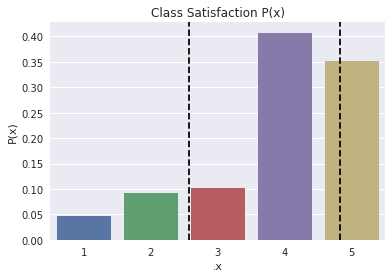

In [52]:
ax1 = sns.barplot(data=class_df2,x='.x',y='P(x)')
ax1.set_title('Class Satisfaction P(x)')
ax1.axvline(3.7-2.13, color='k', linestyle='--')
ax1.axvline(3.7+.13, color='k', linestyle='--')

# IV The Binomial Distribution

## Equation
\begin{equation}
C(n,x)p^x(1-p)^{n-x}
\end{equation}
n = number of trials

x = number of successes

p = probability of success in any trial

Example:
    
As a sales manager you analyze the sales records for all salespersons under your guidance.

Joan has a success rate of 75% and averages 10 calls per day. Margo has a success rate of 45% but averages 16 calls per day

What is the probability that each salesperson makes 6 sales on any given day?

## Binomial Experiment
A binomial experiment has the following chareacteristics:
1. The process consists of a sequence of n trials
2. Only two exclusive outcomes are possible in each trial. One outcome is called a "success" and the other a "failure"
3. The probability of a success denoted by p, does not change from trial to trial. The probability of failure is 1 - p and is also fixed from trial to trial
4. The trials are independent; the outcome of previous trials do not influence future trials

- For example let's consider an experiment involving 5 trials; n = 5
- Our interest is in the number of "successes" in n trials
- We establish a discrete random variable X to represent the number of successes in our trials
X = # of successes in 5 trials

x = 0,1,2,3,4,5

In [57]:
binom_df = pd.DataFrame({'.Trial': ['Outcome1','Outcome2'],
                         '1': [True, True], 
                         '2': [False,True],
                         '3': [False,False],
                         '4': [True,True],
                         '5': [False,True]})
binom_df

,.Trial,1,2,3,4,5
0,Outcome1,True,False,False,True,False
1,Outcome2,True,True,False,True,True


In [59]:
binom_df = pd.DataFrame({'.Trial': ['Outcome','Outcome','Outcome','Outcome','Outcome'],
                         '1': [True, True, False,True,True], 
                         '2': [False, True, True,True,True],
                         '3': [True, True, True, False, True],
                         '4': [True, False, True, True,True],
                         '5': [True, True, True,True, False]})
print("Valid outcomes with 4 successes and 1 failure")
binom_df

Valid outcomes with 4 successes and 1 failure


,.Trial,1,2,3,4,5
0,Outcome,True,False,True,True,True
1,Outcome,True,True,True,False,True
2,Outcome,False,True,True,True,True
3,Outcome,True,True,False,True,True
4,Outcome,True,True,True,True,False


\begin{equation}
C(5,4) = 5
\end{equation}

In [64]:
binom_df = pd.DataFrame({'#.n': [5,5,5,5,5,5], 
                         '#successes': [0,1,2,3,4,5], "#failures":[5,4,3,2,1,0], 
                         'combination':['C(5,0)','C(5,1)','C(5,2)','C(5,3)','C(5,4)','C(5,5)'], 
                         'total':[1,5,10,10,5,1]})
print("Valid outcomes with 4 successes and 1 failure")
binom_df

Valid outcomes with 4 successes and 1 failure


,#.n,#failures,#successes,combination,total
0,5,5,0,"C(5,0)",1
1,5,4,1,"C(5,1)",5
2,5,3,2,"C(5,2)",10
3,5,2,3,"C(5,3)",10
4,5,1,4,"C(5,4)",5
5,5,0,5,"C(5,5)",1


## Problem Quality Control
A very poor manufacturer is making a product with a 20% defect rate. If we select 5 randomly chosen items at the end of the assembly line, what is the probability of having 1 defective item in our sample?

n = 5 and #successes x=1 C(5,1) = 5

p = .2

p-1 = .8

In [92]:
qc_df = pd.DataFrame({'.Trial': ['Outcome','Outcome','Outcome','Outcome','Outcome'],
                      '1': [.8,.8,.2,.8,.8], 
                      '2':[.2,.8,.8,.8,.8],
                      '3':[.8,.8,.8,.2,.8],
                      '4':[.8,.2,.8,.8,.8],
                      '5':[.8,.8,.8,.8,.2], 
                      'calculation':['.8*.8*.8*.8*.2','.8*.8*.8*.8*.2','.8*.8*.8*.8*.2','.8*.8*.8*.8*.2','.8*.8*.8*.8*.2']})
qc_df['Probability'] = qc_df.product(axis=1)#[.08192,.08192,.08192,.08192,.08192]
qc_df.loc[5] = ['Sum','-','-','-','-','-','-',qc_df['Probability'].sum()]
qc_df

,.Trial,1,2,3,4,5,calculation,Probability
0,Outcome,0.8,0.2,0.8,0.8,0.8,.8*.8*.8*.8*.2,0.08192
1,Outcome,0.8,0.8,0.8,0.2,0.8,.8*.8*.8*.8*.2,0.08192
2,Outcome,0.2,0.8,0.8,0.8,0.8,.8*.8*.8*.8*.2,0.08192
3,Outcome,0.8,0.8,0.2,0.8,0.8,.8*.8*.8*.8*.2,0.08192
4,Outcome,0.8,0.8,0.8,0.8,0.2,.8*.8*.8*.8*.2,0.08192
5,Sum,-,-,-,-,-,-,0.40960


\begin{equation}
C(n,x)p^x(1-p)^{n-x}
\end{equation}

\begin{equation}
C(5,1)*.2^1*(1-.2)^{5-1} = C(5,1)*.2^1*(.8)^{4} = .4096
\end{equation}

\begin{equation}
C(n,x)p^x(1-p)^{n-x}
\end{equation}
n = number of trials

x = number of successes

p = probability of success in any trial

In [101]:
qc_df = pd.DataFrame({'#.n': [5,5,5,5,5,5], 
                         '#successes': [0,1,2,3,4,5], "#failures":[5,4,3,2,1,0], 
                         'calculation':['C(5,0)*.2^0*.8^5','C(5,1)*.2^1*.8^4','C(5,2)*.2^2*.8^3','C(5,3)*.2^3*.8^2','C(5,4)*.2^4*.8^1','C(5,5)*.2^5*.8^0'], 
                         '#defectives':[0,1,2,3,4,5]})
numbers = []
for i in range(0,6):
    numbers.append(len(list(itt.combinations(range(0,5),i))))

qc_df['Probability'] = numbers*(.2**qc_df['#successes'])*(.8**qc_df['#failures'])
print("Probabilities of various successes and various failure")
qc_df

Probabilities of various successes and various failure


,#.n,#defectives,#failures,#successes,calculation,Probability
0,5,0,5,0,"C(5,0)*.2^0*.8^5",0.32768
1,5,1,4,1,"C(5,1)*.2^1*.8^4",0.40960
2,5,2,3,2,"C(5,2)*.2^2*.8^3",0.20480
3,5,3,2,3,"C(5,3)*.2^3*.8^2",0.05120
4,5,4,1,4,"C(5,4)*.2^4*.8^1",0.00640
5,5,5,0,5,"C(5,5)*.2^5*.8^0",0.00032


Text(0.5,1,'Quality Control, n=5 and p=.2')

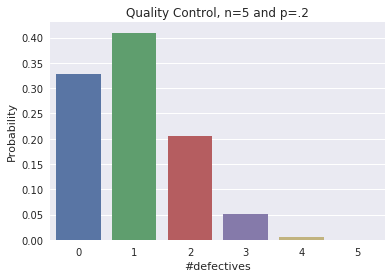

In [102]:
ax1 = sns.barplot(data=qc_df,x='#defectives',y='Probability')
ax1.set_title('Quality Control, n=5 and p=.2')

## Problem Sales
As a sales manager you analyze the sales records for all salespersons under your guidance.

Joan has a success rate of 75% and averages 10 calls per day. Margo has a success rate of 45% but averages 16 calls per day

What is the probability that each salesperson makes 6 sales on any given day?

Probability of Joan closing 6 sales
\begin{equation}
C(n,x)p^x(1-p)^{n-x} = C(10,6)*.75^6*(1-.75)^{10-6} = 0.146
\end{equation}
n = number of trials

x = number of successes

p = probability of success in any trial

Probability of Margo closing 6 sales
\begin{equation}
C(n,x)p^x(1-p)^{n-x} = C(16,6)*.45^6*(1-.45)^{16-6} = 0.168
\end{equation}

In [105]:
joan_df = pd.DataFrame({'#successes': [0,1,2,3,4,5,6,7,8,9,10], "#failures":[10,9,8,7,6,5,4,3,2,1,0]})
numbers = []
for i in range(0,11):
    numbers.append(len(list(itt.combinations(range(0,10),i))))

joan_df['Probability'] = numbers*(.75**joan_df['#successes'])*(.25**joan_df['#failures'])

margo_df = pd.DataFrame({'#successes': [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], "#failures":[16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0]})
numbers = []
for i in range(0,17):
    numbers.append(len(list(itt.combinations(range(0,16),i))))

margo_df['Probability'] = numbers*(.45**margo_df['#successes'])*(.55**margo_df['#failures'])

/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


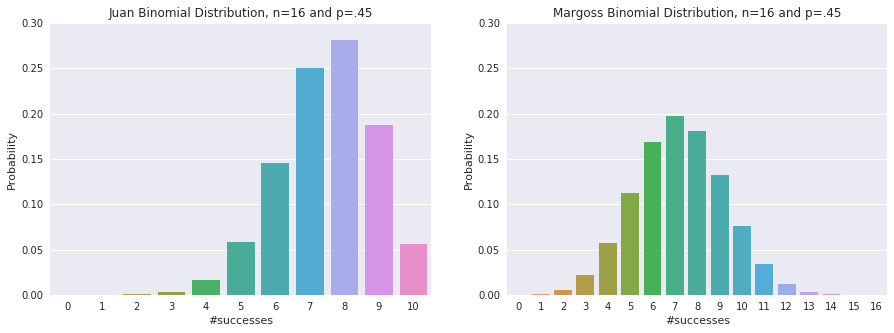

In [138]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax1 = sns.barplot(data=joan_df,x='#successes',y='Probability',ax=ax[0])
ax2 = sns.barplot(data=margo_df,x='#successes',y='Probability',ax=ax[1])
ax1.set_title('Juan Binomial Distribution, n=16 and p=.45')
ax2.set_title('Margoss Binomial Distribution, n=16 and p=.45')
ax1.set_ylim(0,.3)
ax2.set_ylim(0,.3)
fig.show()

In [114]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)
display_side_by_side(joan_df,margo_df)

,#failures,#successes,Probability
0,10,0,9.536743e-07
1,9,1,2.861023e-05
2,8,2,3.862381e-04
3,7,3,3.089905e-03
4,6,4,1.622200e-02
5,5,5,5.839920e-02
6,4,6,1.459980e-01
7,3,7,2.502823e-01
8,2,8,2.815676e-01
9,1,9,1.877117e-01


# Binomial Mean and Standard Deviation

Problem Sales
As a sales manager you analyze the sales records for all salespersons under your guidance.

Joan has a success rate of 75% and averages 10 calls per day. Margo has a success rate of 45% but averages 16 calls per day

What is the probability that each salesperson makes 6 sales on any given day?



/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


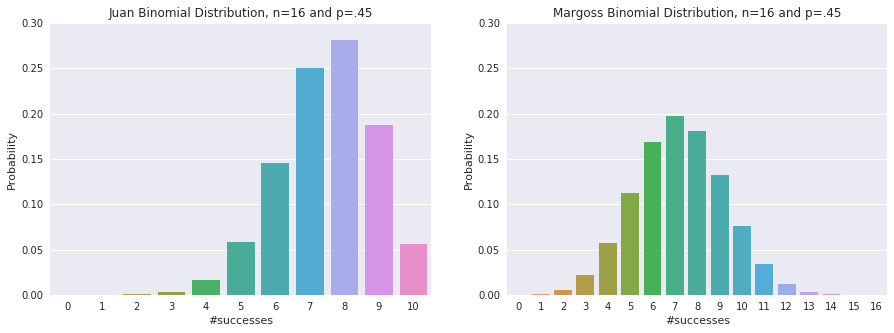

In [124]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax1 = sns.barplot(data=joan_df,x='#successes',y='Probability',ax=ax[0])
ax2 = sns.barplot(data=margo_df,x='#successes',y='Probability',ax=ax[1])
ax1.set_title('Juan Binomial Distribution, n=16 and p=.45')
ax2.set_title('Margoss Binomial Distribution, n=16 and p=.45')
ax1.set_ylim(0,.3)
ax2.set_ylim(0,.3)
fig.show()


What is the mean and standard deviation of # daily sales for each employee?

n = number of calls

p = probability of success in any call

q = (1-p) probability of failure

## Binomial Mean (EXPECTED) Value
\begin{equation}
\mu = n * p
\end{equation}

In [126]:
tog_df = pd.DataFrame({'n': [10,16],'p':[.75,.45],'q':[.25,.55]}, index = ['Joan','Margo'])
tog_df

,n,p,q
Joan,10,0.75,0.25
Margo,16,0.45,0.55


Joan's mean # daily sales

$\mu = 10*.75 = 7.5$

Margo's mean # daily sales

$\mu = 16*.45 = 7.2$

We expect 7.5 sales and 7.2 sales per day

## Binomial Mean Standard Deviation
\begin{equation}
\sigma = \sqrt{n*p*q}
\end{equation}

In [128]:
tog_df

,n,p,q
Joan,10,0.75,0.25
Margo,16,0.45,0.55


Joan's daily sales standard deviation

$\sigma = \sqrt{10*.75*.25} = 1.37$ 

Margo's daily sales standard deviation

$\sigma = \sqrt{16*.45*.55} = 1.99$ 

What is the mean and standard deviation of # daily sales for each employee?

/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


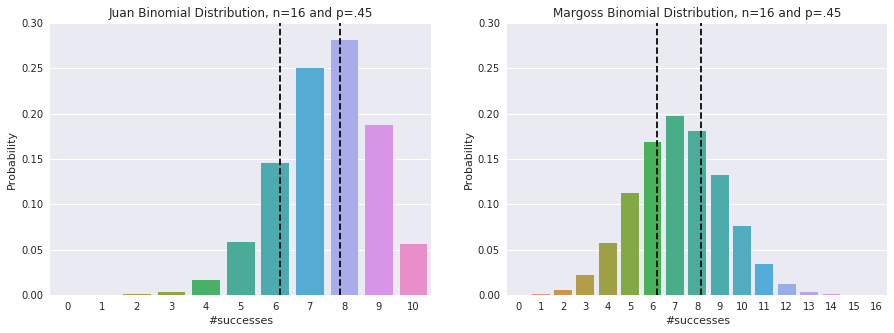

In [140]:
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax1 = sns.barplot(data=joan_df,x='#successes',y='Probability',ax=ax[0])
ax2 = sns.barplot(data=margo_df,x='#successes',y='Probability',ax=ax[1])
ax1.set_title('Juan Binomial Distribution, n=16 and p=.45')
ax2.set_title('Margoss Binomial Distribution, n=16 and p=.45')
ax1.set_ylim(0,.3)
ax2.set_ylim(0,.3)
ax1.axvline(7.5-1.37, color='k', linestyle='--')
ax1.axvline(7.5+.37, color='k', linestyle='--')
ax2.axvline(7.2-.99, color='k', linestyle='--')
ax2.axvline(7.2+.99, color='k', linestyle='--')
fig.show()

In [131]:
tog_df = pd.DataFrame({'u': [7.5,7.2],'sigma':[1.37,1.99]}, index = ['Joan','Margo'])
tog_df

,sigma,u
Joan,1.37,7.5
Margo,1.99,7.2


#Example Evolution
In a May 2012 Gallup poll, 46% of Americans said the following statement most closely matched their views:

"God created human beings pretty much in their present form at one time within the past 10,000 years or so."

If you wanted to replicate this poll in 2013 with a sample of 78 similar people, what is the expected number of respondents that would agree with this statement?

$\mu = n*p = 78*.46 = 35.88$
36 people should agree with that statement

$\sigma = \sqrt{n*p} = \sqrt{78*.46*.54} = 4.4$

# Simple Binomial Sales Quota Analysis

As a sales manager you analyze the sales records for all salespersons under your guidance.

Joan has a success rate of 75% and averages 10 calls per day. Margo has a success rate of 45% but averages 16 calls per day

What is the probability that each salesperson makes AT LEAST 6 sales on any given day?

Cumalative Probability


/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


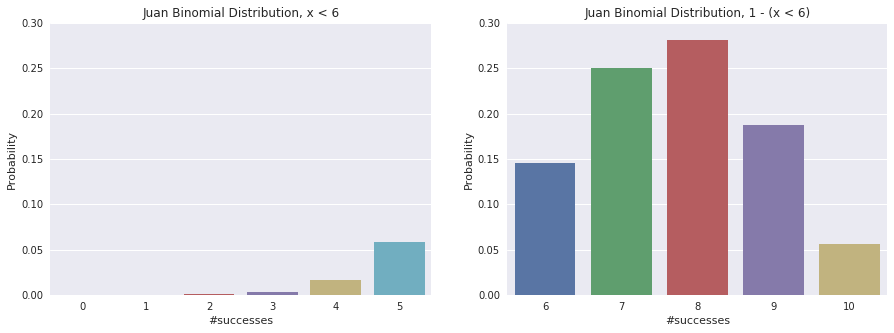

In [149]:
print("Cumalative Probability")
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax1 = sns.barplot(data=joan_df.iloc[:6,:],x='#successes',y='Probability',ax=ax[0])
ax2 = sns.barplot(data=joan_df.iloc[6:,:],x='#successes',y='Probability',ax=ax[1])
ax1.set_title('Juan Binomial Distribution, x < 6')
ax2.set_title('Juan Binomial Distribution, 1 - (x < 6)')
ax1.set_ylim(0,.3)
ax2.set_ylim(0,.3)
fig.show()

In [157]:
x = 5 #probability upper limit
p = .75 #probability of success
n = 10 #trialsx = 5 #probability upper limit
p = .75 #probability of success
n = 10 #trials
print("The cumulative probability starting at x = 0 up to x = 5 is " + str(ss.binom.cdf(x, n, p)))
print("The cumulative probability starting at x = 6 up to x = 10 is " + str(1 - ss.binom.cdf(x, n, p)))
print("The cumulative probability starting at x = 0 up to x = 5 is " + str(ss.binom.cdf(x, n, p)))
print("The cumulative probability starting at x = 6 up to x = 10 is " + str(1 - ss.binom.cdf(x, n, p)))

The cumulative probability starting at x = 0 up to x = 5 is 0.07812690734863285
The cumulative probability starting at x = 6 up to x = 10 is 0.9218730926513672


Cumalative Probability


/usr/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


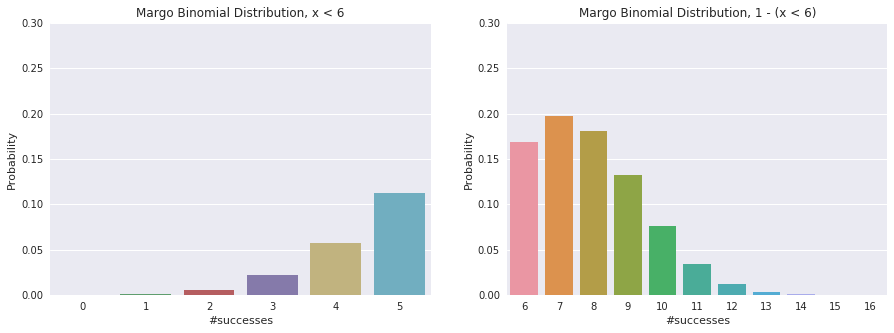

In [158]:
print("Cumalative Probability")
fig, ax =plt.subplots(1,2,figsize=(15,5))
ax1 = sns.barplot(data=margo_df.iloc[:6,:],x='#successes',y='Probability',ax=ax[0])
ax2 = sns.barplot(data=margo_df.iloc[6:,:],x='#successes',y='Probability',ax=ax[1])
ax1.set_title('Margo Binomial Distribution, x < 6')
ax2.set_title('Margo Binomial Distribution, 1 - (x < 6)')
ax1.set_ylim(0,.3)
ax2.set_ylim(0,.3)
fig.show()

In [159]:
x = 5 #probability upper limit
p = .45 #probability of success
n = 16 #trials
print("The cumulative probability starting at x = 0 up to x = 5 is " + str(ss.binom.cdf(x, n, p)))
print("The cumulative probability starting at x = 6 up to x = 10 is " + str(1 - ss.binom.cdf(x, n, p)))

The cumulative probability starting at x = 0 up to x = 5 is 0.19759756004837986
The cumulative probability starting at x = 6 up to x = 10 is 0.8024024399516201


What is the probability that each salesperson makes AT LEAST 6 sales on any given day?

We must sum the probabilities for all values >= 6

Prob(x>=6) = .922
Prob(x>=6) = .80242

Even though Joan has a lower call rate in terms of making fewer calls, her greater probability of making a sale overcomes the lower call volume.
Therefore the greater probability of making 6 or more sales per day belongs to Joan

The probability of any given outcome is a combination of both the number of trials and the success rate.

# Poisson Distribution
Poisson Distribution - focuses on the number of discrete events or occurences over a specified interval or continuum (time, length, distance, etc.)

\begin{equation}
\lambda = \frac{no. occurences}{specified interval}
\end{equation}

E(X) = expected value = $\mu$ = $\lambda$

## Poisson Characteristics
1. Discrete outcomes (x=0,1,2,3,..)
2. The number of occurences in each interval can range from zero to infinity; $0<x< \infty $
3. Describes the distribution of infrequent events
4. Each event is independent of the other events
5. Describes discrete events over an interval (time, distance, etc)
6. Expected number of occurences E(X) are assumed to be constant throughout the experiment

## Poisson Formula

\begin{equation}
P(x) =  \frac{\lambda^xe^{-\lambda}}{x!}
\end{equation}

x = 0,1,2,3 ... $\infty$; # occurences

$\lambda$ or $\mu$ = long run average = $\frac{no. occurences}{interval}

e = 2.1718282 (base of natural logs)

## Problem - Checkout Line
Let's say you are a cashier at Wal-Mart. It is 4:30pm and your shift ends at 5:00. The store policy is to close your checkout line 15 minutes before your shift ends so you can finish checking-out the customers already in your line and leave on-time.

By examining overhead cameras, store data indicates that between 4:30pm and 4:45pm each weekday, an average of 10 customers enter any given checkout line.
    
What is the probability that exactly 7 customers enter your line between 4:30 and 4:45? What is the probability that more than 10 people arrive?

Between 4:30:00pm and 4:49:59pm
                
Which outcome (# customers) is your expected value/mean?  10 people according to the question

$\lambda = \frac{10 customers}{per 15 minutes} = 10$

### Probability of exactly 7 customers
What is the probability that exactly 7 customers enter your line between 4:30 and 4:45?

x = 7
$\lambda$ = 10
e = 2.1718282

\begin{equation}
P(x) =  \frac{\lambda^xe^{-\lambda}}{x!}
\end{equation}

\begin{equation}
P(7) =  \frac{10^7e^{-10}}{7!} = .09
\end{equation}


Text(0.5,1,'POISSON CUSTOMER ARRIVALS, lambda=10')

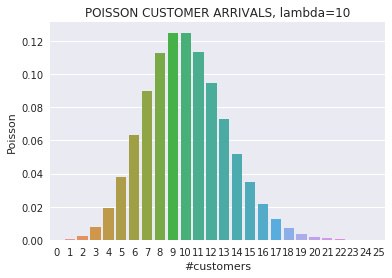

In [2]:
mu = 10
def poisson(col):
    p = ((mu**col)*(math.exp(-mu))/(math.factorial(col)))
    return p
         
cust_df = pd.DataFrame({'#customers': range(0,26)})
cust_df['Poisson'] = cust_df['#customers'].apply(poisson)
ax1 = sns.barplot(data = cust_df, x = '#customers',y = 'Poisson')
ax1.set_title('POISSON CUSTOMER ARRIVALS, lambda=10')

What is the probability that more than 10 people arrive?

x = 10

$\lambda$ = 10

e = 2.1718282

\begin{equation}
P(x) =  \frac{\lambda^xe^{-\lambda}}{x!}
\end{equation}

\begin{equation}
P(10) = 1 - \frac{10^{10}e^{-10}}{10!} = 1 - .583 = .417
\end{equation}


In [10]:
x = 10
mu = 10
prob = 1 - ss.poisson.cdf(x, mu)
print('the probability that more than 10 people arrive = ' + str(prob))

the probability that more than 10 people arrive = 0.41696024980701485


How many customer's do you expect to arrive between 4:30 and 4:40?

\begin{equation}
\frac{10 customers}{15 minutes} = \frac{?}{15 minutes}
\end{equation}

\begin{equation}
\frac{10 customers}{15 minutes} = \frac{6.67 customers}{15 minutes}
\end{equation}

Text(0.5,1,'POISSON CUSTOMER ARRIVALS, lambda=6.67')

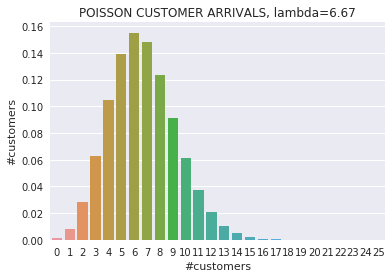

In [3]:
mu = 6.67
ax1 = sns.barplot(data = cust_df, x = '#customers',y = cust_df['#customers'].apply(poisson))
ax1.set_title('POISSON CUSTOMER ARRIVALS, lambda=6.67')

# Poisson Practice Problems
A bank is interested in studying the number of people who use the ATM located outside its office late at night.

On average, 1.6 customers walk up to the ATM suring any 10 minute between 9pm and Midnight.

Questions:
    
What is lambda for this problem?

What is the probability of exactly 3 customers using the ATM during any 10 minute interval?

What is the probability of 3 or fewer people

Answers:

What is lambda for this problem? E(x) = 1.6 customers

Text(0.5,1,'POISSON CUSTOMER ATM ARRIVALS, lambda=6.67')

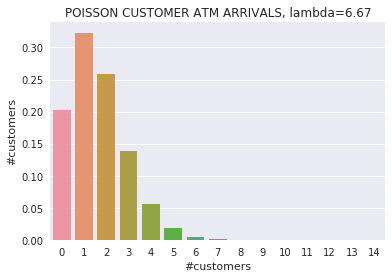

In [5]:
mu = 1.6
custAtm_df = pd.DataFrame({'#customers': range(0,15)})
ax1 = sns.barplot(data = custAtm_df, x = '#customers',y = cust_df['#customers'].apply(poisson))
ax1.set_title('POISSON CUSTOMER ATM ARRIVALS, lambda=6.67')

What is the probability of exactly 3 customers using the ATM during any 10 minute interval?

x = 3
$\lambda$ = 1.6
e = 2.1718282

\begin{equation}
P(x) =  \frac{\lambda^xe^{-\lambda}}{x!}
\end{equation}

\begin{equation}
P(7) =  \frac{1.6^3e^{-10}}{3!} = .138
\end{equation}


In [17]:
mu = 1.6
x = 3
p = ((mu**x)*(math.exp(-mu))/(math.factorial(x)))
p

0.13782802295101812

In [18]:
prob = ss.poisson.pmf(x, mu)
prob

0.13782802295101812

What is the probability of 3 or fewer people?

In [19]:
prob = ss.poisson.cdf(x, mu)
prob

0.9211865127702811

In [21]:
p = ((mu**0)*(math.exp(-mu))/(math.factorial(0))) + ((mu**1)*(math.exp(-mu))/(math.factorial(1))) + ((mu**2)*(math.exp(-mu))/(math.factorial(2))) + ((mu**3)*(math.exp(-mu))/(math.factorial(3)))
p

0.9211865127702811